In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import data
shopify_data = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [5]:
# Look at Data
shopify_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188


In [23]:
# Group data by shop_id
store_data = shopify_data.groupby(shopify_data['shop_id'], as_index = False)[['order_amount','total_items']].sum()
# Create new Average Order Value column
store_data['average_order_value'] = store_data['order_amount'] / store_data['total_items']

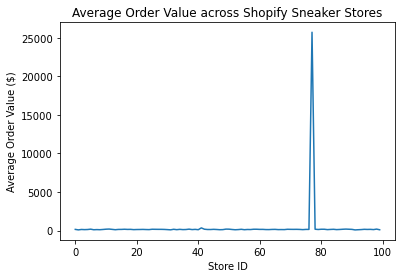

In [39]:
# Plot to see AOV vs Shop
plt.figure()
plt.title('Average Order Value across Shopify Sneaker Stores')
plt.xlabel('Store ID')
plt.ylabel('Average Order Value ($)')
plt.plot(store_data['average_order_value'])
plt.show()

In [31]:
# Locate outlier
store_data.loc[store_data['average_order_value'] > 5000]

,shop_id,order_amount,total_items,average_order_value
77,78,2263800,88,25725.0


In [32]:
# Create copy of data
store_copy = store_data.copy()

In [36]:
# Drop shop id #78 from data
store_copy.drop(store_copy.index[77], inplace = True)

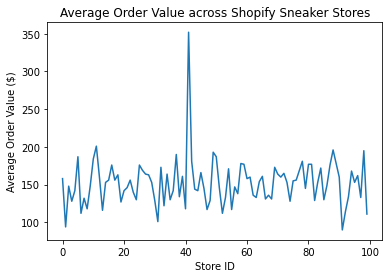

In [41]:
# Replot without outliers
plt.figure()
plt.title('Average Order Value across Shopify Sneaker Stores')
plt.xlabel('Store ID')
plt.ylabel('Average Order Value ($)')
plt.plot(store_copy['average_order_value'])
plt.show()

In [38]:
# Calculate AOV
store_copy['average_order_value'].mean()

152.26262626262627

The AOV after removing Store #78 is $152.26